In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


# Kaggle Practice - Digital Skola Batch 11

by : Diaz Jubairy Prabowo
___

**Contents**
- Data Preparation
    - Reading Dataset
    - Check any null values
    - Check data type in each columns
- Data Cleansing
    - Handling null values
    - Delete any duplicate values
    - Change the data type if there is any wrong data type
- Exploratory Data Analysis
    - Show the distribution in each columns
        - add mean, median, mode in each columns (untuk lihat skewness)
        

## Data Prepration

In [2]:
# import library

import pandas as pd
import numpy as np

# import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading dataset
data = pd.read_csv("../input/water-potability/water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
check_nul = pd.DataFrame(data.dtypes).T.rename({0:"column type"})
check_nul

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64


In [5]:
pd.DataFrame(data.isnull().sum()).T.rename({0:'number of null values'})

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
number of null values,491,0,0,0,781,0,0,162,0,0


In [6]:
check_nul = pd.DataFrame(data.dtypes).T.rename({0:"column type"})
check_nul = check_nul.append(pd.DataFrame(data.isnull().sum()).T.rename({0:'number of null values'}))
check_nul

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
column type,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
number of null values,491,0,0,0,781,0,0,162,0,0


In [7]:
pd.DataFrame(data.isnull().sum()/data.shape[0]*100).T.rename({0:"percentage of null values"})

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
percentage of null values,14.98779,0.0,0.0,0.0,23.840049,0.0,0.0,4.945055,0.0,0.0


There are several values in several columns such as :
- ph (15%)
- sulfate (24%)
- Trihalomethanes (5%)

from this null values, we can do a data cleansing either to drop all null values or we fill null values with certain condition

## Data Cleansing

In [8]:
data.shape

(3276, 10)

In [9]:
# Handling null values by dropping the null values

data_v1 = data.dropna()
data_v1.shape

(2011, 10)

In [10]:
# is there any duplicate values ?

data_v1.duplicated().sum()

0

In [11]:
data_v1.drop_duplicates()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [12]:
# example to change the data typr

a = data_v1.copy()
a['Potability'] = a['Potability'].astype("object")
a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   object 
dtypes: float64(9), object(1)
memory usage: 172.8+ KB


In [13]:
a['Potability'].mean()

0.4032819492789657

in this data, we have new variable called **data_v1** which already dropped the null values and duplicate values. in terms of data type, there is no column that contains wrong data type

## Exploratory Data Analysis

(array([  4.,  12.,  84., 353., 915., 898., 382., 116.,  17.,   4.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <BarContainer object of 10 artists>)

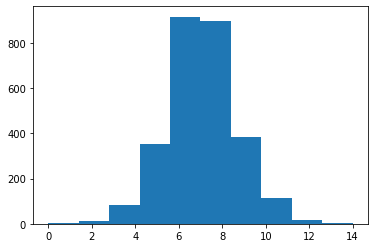

In [14]:
plt.hist(data['ph'])

In [15]:
# create function to visualize the data without new code
def histogram(x):
    """
    this function is to show the distribution of data
    """
    plt.hist(data[x])
    plt.show()

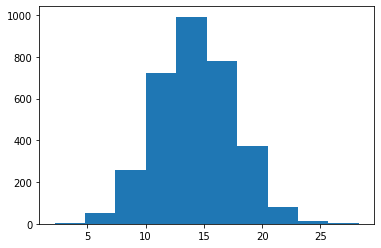

In [16]:
histogram(x="Organic_carbon")

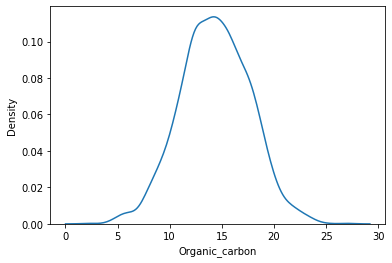

In [17]:
#simple plot
sns.kdeplot(data=data_v1, x='Organic_carbon')
plt.show()

In [18]:
data_v1.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

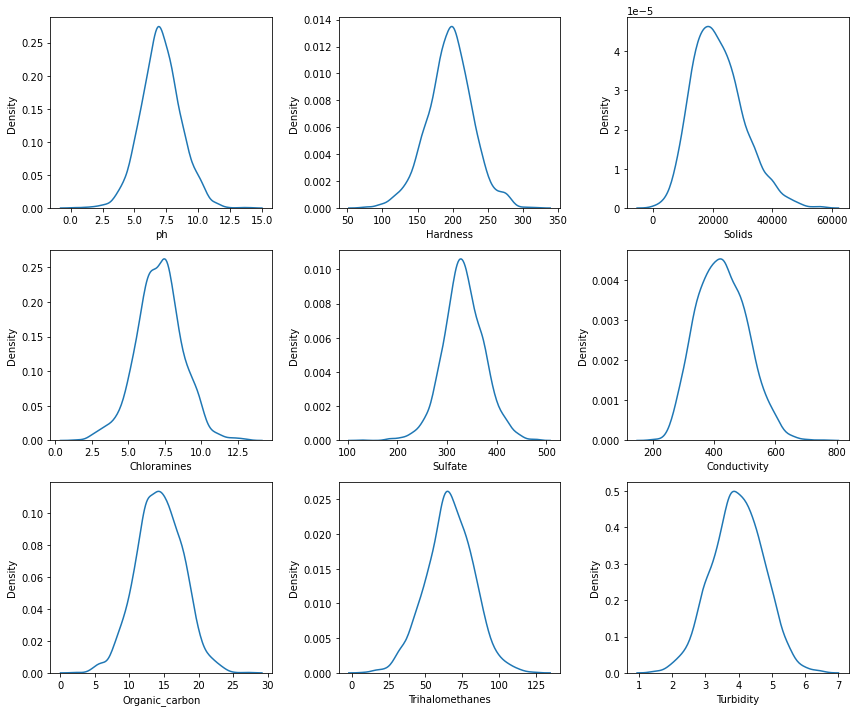

In [19]:
# create function to show the density of the data in distribution
columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, axes = plt.subplots(3, 3, figsize=(12,10))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(columns):
    plot = sns.kdeplot(data=data_v1, x=col, ax=axes[i])
plt.tight_layout()